## ML Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

In [2]:
# Get information about the folder contents
for dirpath, dirnames, filenames in os.walk("archive/train/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'archive/train/'.
There are 0 directories and 665 images in 'archive/train/daisy'.
There are 0 directories and 422 images in 'archive/train/rose'.
There are 0 directories and 472 images in 'archive/train/tulip'.
There are 0 directories and 629 images in 'archive/train/dandelion'.
There are 0 directories and 456 images in 'archive/train/sunflower'.


In [3]:
data_dir_train = pathlib.Path("archive/train/")

class_names_train = os.listdir(data_dir_train)

print(class_names_train, len(class_names_train))

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower'] 5


In [4]:
data_dir_test = pathlib.Path("archive/test/")

class_names_test = os.listdir(data_dir_test)

print(class_names_test, len(class_names_test))

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower'] 5


In [5]:
class_names_dict_train =  dict(zip(class_names_train, range(len(class_names_train))))

len(class_names_dict_train), class_names_dict_train

(5, {'daisy': 0, 'rose': 1, 'tulip': 2, 'dandelion': 3, 'sunflower': 4})

In [6]:
class_names_dict_test =  dict(zip(class_names_test, range(len(class_names_test))))

len(class_names_dict_test), class_names_dict_test

(5, {'daisy': 0, 'rose': 1, 'tulip': 2, 'dandelion': 3, 'sunflower': 4})

In [7]:
import random
import matplotlib.image as mpimg

def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")

    return img

Image shape: (256, 256, 3)


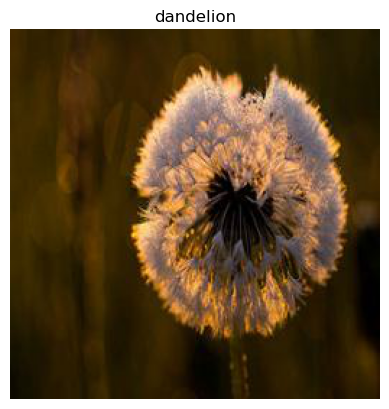

In [8]:
img = display_random_img("archive/train/", random.choice(list(class_names_dict_train)))

## resize all photos
#### the next section should resize all images in a folder to the size (256, 256)

In [22]:
import PIL
import os
import os.path
from PIL import Image

def resize_images(target_item):
    path = 'archive/test/' + target_item
    
    for file in os.listdir(path):
        f_img = path+"/"+file
        img = Image.open(f_img)
        img = img.resize((256,256))
        img.save(f_img)

resize_images('daisy')
resize_images('rose')
resize_images('sunflower')
resize_images('dandelion')
resize_images('tulip')

### the next code section displays a sepcific picture (for testing purposes)

Image Width is 256
Image Height is 256


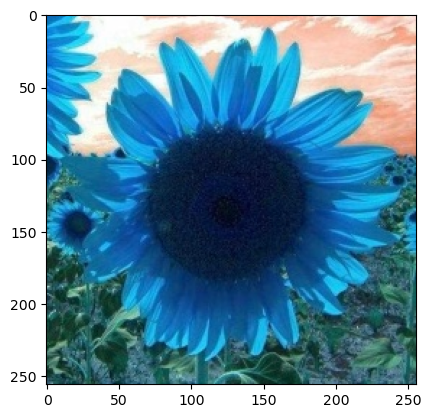

In [10]:
import cv2

image = cv2.imread('archive/train/sunflower/78DIIEPHW7QT.jpg')
print('Image Width is',image.shape[1])
print('Image Height is',image.shape[0])
plt.imshow(image)

Image shape: (444, 600, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)
Image shape: (256, 256, 3)


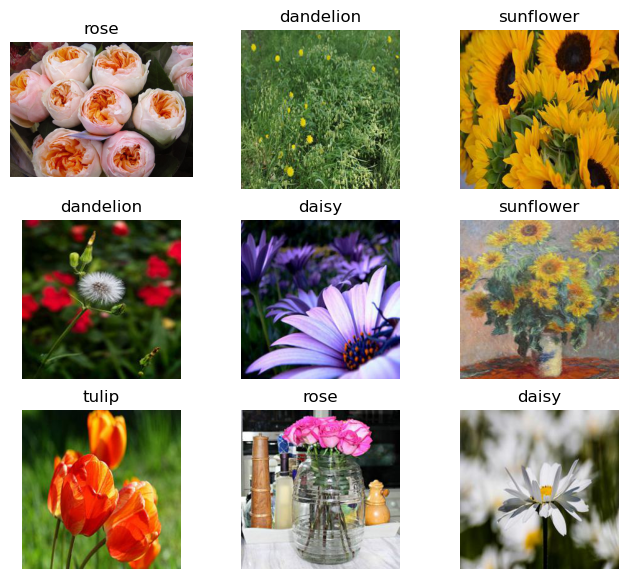

In [11]:
plt.figure(figsize=(8, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img =  display_random_img("archive/train/", random.choice(list(class_names_dict_train)))   
    plt.axis(False)

Image shape: (256, 256, 3)
[[[126  77   0]
  [134  86   1]
  [141  92   0]
  ...
  [210 128  16]
  [196 123  10]
  [185 115   3]]

 [[128  80   0]
  [135  88   0]
  [142  93   0]
  ...
  [199 118  11]
  [191 119  11]
  [185 117  10]]

 [[130  82   0]
  [139  89   0]
  [144  96   0]
  ...
  [183 105   7]
  [178 108  12]
  [175 109  13]]

 ...

 [[123 113 150]
  [121 114 148]
  [118 118 146]
  ...
  [146  74   2]
  [164 109  16]
  [163 121   9]]

 [[120 113 147]
  [119 114 146]
  [117 117 141]
  ...
  [132  60   0]
  [159 106   4]
  [164 124   3]]

 [[120 113 147]
  [119 114 144]
  [117 118 139]
  ...
  [119  48   0]
  [157 104   0]
  [168 128   4]]]


(256, 256, 3)

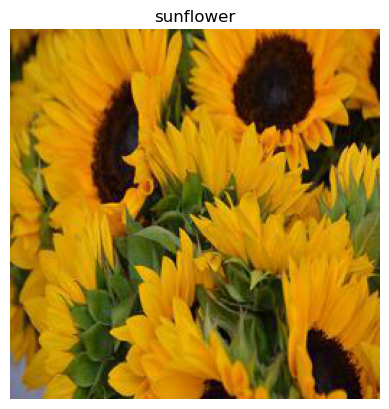

In [12]:
img =  display_random_img("archive/train/", random.choice(list(class_names_dict_train)))
print(np.asarray(img))
img.shape

In [24]:
def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    returns 
    X -- images as numpy array
    y -- labels as numpy array
    """
    # create two numpy arrays
    X = [] # imageArray
    y = [] # labelArray
    
    # search the whole directory
    for (root,dirs,files) in os.walk(target_dir, topdown=True):
     
      for name in files:
            
        filepath = os.path.join(root, name)
        
        img = mpimg.imread(filepath)
        
        normalized = np.asarray(img/255)
        
        X.append(normalized)
        
        y.append(class_name_dictionary[os.path.basename(os.path.dirname(os.path.join(root,name)))])
      
    return X, y

In [25]:
X_train, y_train = load_images_as_features_and_labels('archive/train/', class_names_dict_train)
X_test, y_test = load_images_as_features_and_labels('archive/test/', class_names_dict_test)


X_train, y_train, X_test, y_test

([array([[[0.2627451 , 0.32156863, 0.24705882],
          [0.23137255, 0.29019608, 0.21568627],
          [0.2       , 0.25882353, 0.18431373],
          ...,
          [0.24313725, 0.28627451, 0.12941176],
          [0.25490196, 0.29803922, 0.14117647],
          [0.2627451 , 0.30588235, 0.14901961]],
  
         [[0.18039216, 0.23529412, 0.16862745],
          [0.15294118, 0.20784314, 0.14117647],
          [0.12941176, 0.18431373, 0.11764706],
          ...,
          [0.24705882, 0.29019608, 0.13333333],
          [0.25490196, 0.29803922, 0.14117647],
          [0.2627451 , 0.30588235, 0.14901961]],
  
         [[0.12156863, 0.17254902, 0.10588235],
          [0.10196078, 0.15294118, 0.08627451],
          [0.09019608, 0.14117647, 0.0745098 ],
          ...,
          [0.25098039, 0.29019608, 0.14509804],
          [0.25882353, 0.29803922, 0.15294118],
          [0.2627451 , 0.30196078, 0.15686275]],
  
         ...,
  
         [[0.08235294, 0.14509804, 0.04313725],
          [0.0

In [26]:
import os
import cv2
bad_list=[]
dir= 'archive/train'
subdir_list=os.listdir(dir) # create a list of the sub directories in the directory ie train or test
for d in subdir_list:  # iterate through the sub directories train and test
    dpath=os.path.join (dir, d) # create path to sub directory
    if d in ['test', 'train']:
        class_list=os.listdir(dpath) # list of classes ie dog or cat
       # print (class_list)
        for klass in class_list: # iterate through the two classes
            class_path=os.path.join(dpath, klass) # path to class directory
            #print(class_path)
            file_list=os.listdir(class_path) # create list of files in class directory
            for f in file_list: # iterate through the files
                fpath=os.path.join (class_path,f)
                index=f.rfind('.') # find index of period infilename
                ext=f[index+1:] # get the files extension
                if ext  not in ['jpg', 'png', 'bmp', 'gif']:
                    print(f'file {fpath}  has an invalid extension {ext}')
                    bad_list.append(fpath)                    
                else:
                    try:
                        img=cv2.imread(fpath)
                        size=img.shape
                    except:
                        print(f'file {fpath} is not a valid image file ')
                        bad_list.append(fpath)
                       
print (bad_list)
                   
    

[]


In [27]:
np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

#np.asarray(X_train).shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2644,) + inhomogeneous part.

In [17]:
def print_multiple_figures(images_array):
    plt.figure(figsize=(9, 9))
    for idx, img in enumerate(images_array[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

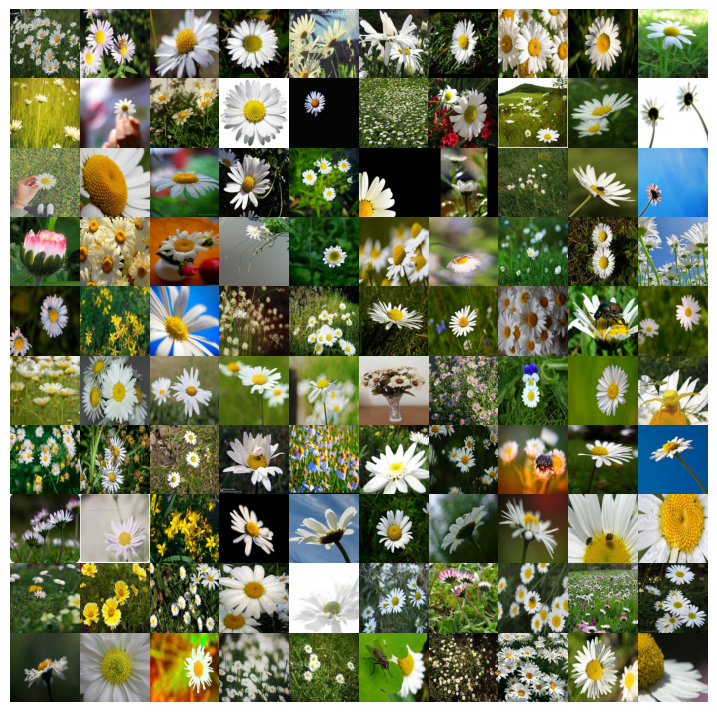

In [18]:
print_multiple_figures(X_train)

In [ ]:
# Random forest classifier needs input in shape of (batch, flattended image) i.e (2787, 3072) -> 256*256*3  = 196608
# first we need to calculate the data thats needs to be reshaped
# for the train data set
num_X_train = np.shape(X_train)[1] * np.shape(X_train)[2] * np.shape(X_train)[3]
# and for the test data set
num_X_test = np.shape(X_test)[1] * np.shape(X_test)[2] * np.shape(X_test)[3]
# then we use the np.reshape function to reshape the data sets
# we reshape the train data set
X_train_flattened = np.reshape(X_train, (np.shape(X_train)[0], num_X_train))
# and the test data set
X_test_flattened = np.reshape(X_test, (np.shape(X_test)[0], num_X_test))
# the print the shape of both flattened sets to check if the reshape is correct
X_train_flattened.shape, X_test_flattened.shape

## Random Forest Modifyer

In [ ]:
#% % time # print the time the gpu needs to create/train the model, but command did not work in our notebook
from sklearn.ensemble import RandomForestClassifier
# TODO: load the classifier
# we first construct a RandomForestCalssifiert
# n_jobs - -1 means we use all processors to train/create the model no just one
# for all other parameters we use the default values (e.g. 100 n_estimators)
rnf_clf =  RandomForestClassifier(n_jobs=-1)
# TODO: train the classifier on the data set
# then we train it with the .fit function with our train data set
rnf_clf.fit(X_train_flattened, y_train, sample_weight=None)

In [ ]:
# use the now created classifiert to make prediction on the test data set
y_pred_clf =  rnf_clf.predict(X_test_flattened)
print (y_pred_clf)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# TODO: Add your code here
# First we calculate the accuracy how many predicted labels exaclty correspond to the labels in test data set
print("Accuracy: %.2f %% " % (100.0*accuracy_score(y_test, y_pred_clf)))
# Then the precision the ability of the classifier not to label as positive a sample that is negative
print("Precision: %.2f %%" % (100.0*precision_score(y_test, y_pred_clf, average='weighted')))
# Then the recall the ability of the classifiert to find all the positive samples
print("Recall: %.2f %%" % (100.0*recall_score(y_test, y_pred_clf, average='weighted')))
# And the F1 score its the harmonic mean of the precision and recall
print("F1: %.2f %%" % (100.0*f1_score(y_test, y_pred_clf, average='weighted')))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict_train.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

## mit CNN

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("archive/train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(256, 256))
# load val data
test = imagegen.flow_from_directory("archive/test/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(256, 256))


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=5, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
model.fit(train, epochs=30, validation_data=test)



In [ ]:
model.summary()

In [ ]:
train_dir = "archive/train/"
test_dir = "archive/test/"

BATCH_SIZE = 512
# TODO load the training set
# used the image_dataset_from_directory function to load the images
# shuffle  - is used to shuffle the date, if false is set the data is sort in aplpanumberic order
# image_size - size to resize images
# lables - used to create lababel, "inferred" means it generate the labels according to dir

# first we load the training data
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, image_size=(256,256), labels='inferred', label_mode='categorical', batch_size=BATCH_SIZE)
# then we load the test data
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=False, image_size=(256,256), labels='inferred', label_mode='categorical', batch_size=BATCH_SIZE) # TODO load the testing set

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy', "Recall", "Precision"])

In [ ]:
# TODO: fit your model here
# Then we fit our model using the training data and the test data for validation
# after expiremting a bit we decided to use 30 epochs for training
history = model.fit(train_data, validation_data=(test_data), epochs=30)

In [ ]:
loss, accuracy, recall, precision = model.evaluate(test_data)
print("Loss: %.2f %%" % (100*loss))
print("Accuracy: %.2f %%" % (100*accuracy))
print("Recall: %.2f %%" % (100*recall))
print("Precision: %.2f %%"% (100*precision))

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    recall = history.history['recall']
    val_recall = history.history['val_recall']

    precision = history.history['precision']
    val_precision = history.history['val_precision']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot recall
    plt.figure()
    plt.plot(epochs, recall, label='training_recall')
    plt.plot(epochs, val_recall, label='val_recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot precision
    plt.figure()
    plt.plot(epochs, precision, label='training_precision')
    plt.plot(epochs, val_precision, label='val_precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.legend();

In [ ]:
plot_loss_curves(history)

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
y_test = np.concatenate([y for x, y in test_data], axis=0)
y_test.argmax(axis=1)

In [ ]:
y_pred.argmax(axis=1).shape

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict_train.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

In [ ]:
model.save('saved_models/CNN_flower_recognition')